## MobileNetV2

In [1]:
import imageio.v2 as imageio
from PIL import Image
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
import imageio.v2 as imageio  
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.mobilenet_v2 import decode_predictions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect")
os.getcwd()


'c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect'

In [3]:
MobileNetV2 = MobileNetV2(weights='imagenet')
MobileNetV2

<Functional name=mobilenetv2_1.00_224, built=True>

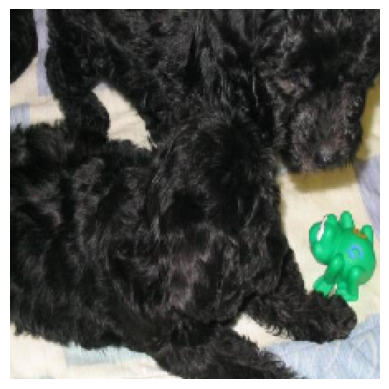

In [5]:
# Bild laden
image_path = r"cats_and_dogs_small\test\dogs\1509.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(224, 224))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [7]:
img = imageio.imread(image_path)

# Bild auf die gewünschte Größe (224, 224) skalieren
img_resized = Image.fromarray(img).resize((224, 224))

# Bild in das numpy Array einfügen
data = np.empty((1, 224, 224, 3))
data[0] = np.array(img_resized)

In [8]:
data = preprocess_input(data)
data.shape

(1, 224, 224, 3)

In [9]:
predictions = MobileNetV2.predict(data)
print('Shape: {}'.format(predictions.shape))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
Shape: (1, 1000)


In [10]:
output_neuron = np.argmax(predictions[0])
print('Most active neuron: {} ({:.2f}%)'.format(
    output_neuron,
    100 * predictions[0][output_neuron]
))


Most active neuron: 183 (37.33%)


In [11]:
for name, desc, score in decode_predictions(predictions)[0]:
    print('- {} ({:.2f}%%)'.format(desc, 100 * score))

- Kerry_blue_terrier (37.33%%)
- Bouvier_des_Flandres (15.36%%)
- Scotch_terrier (11.63%%)
- toy_poodle (5.85%%)
- affenpinscher (3.98%%)


---
## Fine tune MobileNetV2

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25)